======= For International Students ======= 
Write a program to construct dictionary of corpus EnglishDataset_Assignment1.txt. (there are 25000 IMDB movie reviews) You have to do:
 - Preprocessing: tokenization, stopword removal, remove punctuation, and stemming (simple normalization if needed).
 - Sort terms by term frequency and draw a figure to prof they follow Zipf‘s law (long-tail distribution). 
 - Rank terms by global TF-IDF.
 - Save the result as a txt file. 


# Preprocessing Data

## Import all needed packages
Please install all packages first

!!! Use `nltk.download()` to download all NLTK dataset to 'C:\nltk_data' if you don't have

Please refer to this link: https://www.nltk.org/data.html

In [2]:

import operator
import nltk
import os
import string
import inflect
import logging
import numpy, matplotlib
import math
import pandas as pd
from matplotlib import pyplot as plt
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.probability import FreqDist

## Read data, remove non ascii character, lowercase all word

In [2]:
with open('data.txt', encoding='utf8') as f:
    data = f.read().split('\n')
    f.close()
data = [s.encode('ascii', errors = 'ignore').decode() for s in data] #Remove non ascii characters
data = [s.lower() for s in data] #Lowercase all words


In [ ]:
with open('task2_trainset.csv', encoding='utf-8') as f:
    data = f.read().split('\n')
    data = [row.split(',') for row in data]

## Tokenization by using NLTK

In [3]:
words = [nltk.word_tokenize(s) for s in data]
len(words)

25001

## Normalization
1. Remove punctuation and whitespace words
2. Replace number
3. Remove stop words
4. Stemming
5. Lemmatization

In [4]:
def remove_breakline(words): #I found out cleaning & normalization can not remove HTML breakline character <br></br>
    return [w for w in words if w != 'br']

def remove_punctuation_whitespace(words): #Remove all punctuation and whitespace characters
    pun_and_ws = string.punctuation+string.whitespace
    new_words = [''.join(c for c in w if c not in pun_and_ws) for w in words]
    new_words = [w for w in new_words if w != '']
    return new_words

def replace_number(words): #Converse number to text. Eg: '1' to 'one'
    p = inflect.engine()
    new_words = [p.number_to_words(w) if w.isdigit() else w for w in words]
    return new_words

def remove_stopwords(words): #Remove stopwords by using nltk.corpus.stopwords
    stop_words = stopwords.words('english')
    new_words = [w for w in words if w not in stop_words]
    return new_words

# I decided to ignore stemming step because it caused a lot of bugs like: 'comedy' -> 'comedi'
"""
def stem_words(words): #Porter seems to be better than Lancaster
    stemmer = LancasterStemmer()
    new_words = [stemmer.stem(w) for w in words]
    return new_words
"""

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    new_words = [lemmatizer.lemmatize(w) for w in words]
    return new_words

def normalize(words):   
    words = [remove_breakline(w) for w in words]
    words = [remove_punctuation_whitespace(w) for w in words]
    words = [replace_number(w) for w in words]
    words = [remove_stopwords(w) for w in words]
    # words = [stem_words(w) for w in words] 
    # I decided to ignore stemming step because it caused a lot of bugs like: 'comedy' -> 'comedi'
    words = [lemmatize_verbs(w) for w in words]
    return words

if __name__ == "__main__":
    words = normalize(words)


# Data Representation
1. Get a dic of word frequency. 
> Since there is the word 'would' in top 10, nltk.stopwords doesn't seem good
2. Plot a line chart, it's look like Zipf's law

Top 100 high frequency words: 
[('movie', 50933), ('film', 46359), ('nt', 33382), ('one', 28424), ('like', 20257), ('time', 15429), ('good', 14862), ('character', 14062), ('would', 13393), ('story', 12948), ('even', 12608), ('get', 12464), ('make', 11945), ('see', 11859), ('really', 11728), ('scene', 10473), ('well', 9808), ('much', 9693), ('could', 9395), ('people', 9354), ('bad', 9136), ('also', 9122), ('great', 9030), ('two', 8957), ('first', 8909), ('way', 8702), ('show', 8510), ('thing', 8188), ('made', 8083), ('think', 7719), ('life', 7656), ('go', 7485), ('watch', 7025), ('know', 7022), ('love', 6730), ('actor', 6709), ('many', 6666), ('plot', 6657), ('seen', 6646), ('end', 6553), ('look', 6497), ('say', 6496), ('never', 6442), ('year', 6423), ('acting', 6422), ('little', 6407), ('best', 6343), ('ever', 5890), ('better', 5707), ('man', 5676), ('come', 5649), ('take', 5641), ('still', 5627), ('work', 5500), ('part', 5150), ('find', 5074), ('something', 5012), ('want', 4984), ('gi

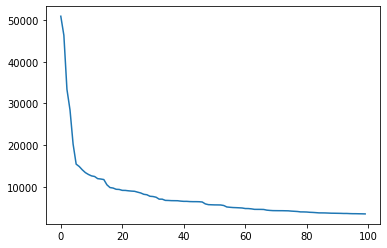

In [5]:
def get_frequency(words):
    frequency = {}
    for s in words:
        for w in s:
            if w in frequency:
                frequency[w] += 1
            else:
                frequency[w] = 0
    return frequency

def nltk_freqdist(words):
    new_words = [small_w for w in words for small_w in w]
    return FreqDist(new_words)

def print_sorted_tf(tf, number):
    sorted_frequency = sorted(tf.items(), key = operator.itemgetter(1), reverse=True)
    print('Top {} high frequency words: \n{}\n'.format(number, sorted_frequency[0:number]))
    
def print_plot_freqdist(tf, number):
    x = range(number)
    y = sorted(list(tf.values()), reverse=True)[:number]
    print('Frequency Distribution: \n', plt.plot(x,y))
    
def get_tfidf(tf, words):
    tfidf = dict([(w,0) for w in tf.keys()])
    #Calculate df
    for w in words:
        distinct_w = set(w)
        for key in distinct_w:
            tfidf[key]+=1
    #Calculate idf & tfidf
    for key in tfidf:
        tfidf[key] = math.log10(len(words)/tfidf[key])
        tfidf[key] *= tf[key]
    return tfidf

def print_sorted_tfidf(tfidf, number):
    sorted_tfidf = sorted(tfidf.items(), key = operator.itemgetter(1), reverse=True)
    print('Top {} high TF-IDF words: \n{}\n'.format(number, sorted_tfidf[0:number]))
    return sorted_tfidf
        
if __name__ == "__main__":
    #frequency = get_frequency(words) #normal way
    tf = nltk_freqdist(words) #I found this shorter way with nltk 
    print_sorted_tf(tf, 100)
    tfidf = get_tfidf(tf, words)
    sorted_tfidf = print_sorted_tfidf(tfidf, 100)
    print_plot_freqdist(tf, 100)

# Save file

In [6]:
f = open('tfidf.txt', 'w', encoding='utf-8')
for w in sorted_tfidf:
    f.write('{}: {}\n'.format(w[0], w[1]))
f.close()